# Innovation and Trade Project

Author: Michael Piseno (mpiseno@gatech.edu)

In this project, we will explore how technology and innovation led to increased trade the Middle East and Asia around 1200CE. You will have an opportunity to model different trading patterns using programming, plot the results, and interpret your findings in the context of your knowledge of the time period. The purpose of this project is to combine your knowledge of Silk Road trade with analytical skills such as creating and intepreting graphs, simulating processes, and programming tools to model your hypotheses.

<b>Prerequisites</b>: Installing python and jupyter and (very) basic knowledge of python. For help on these, you can refer to the [Fractal guides](https://www.fractalai.org/guides/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

from models import Empire
from utils import Logger 

In [2]:
# Set up each empire and the goods that they start with
# First, the Song Dynasty was known for its teas, gunpowder, and printing abilities
song_dynasty_goods = {
    'tea': 1000,
    'gunpowder': 500,
    'paper': 1500
}

song_dynasty = Empire(name="Song Dynasty", goods=song_dynasty_goods)

# Now the Abbasid Caliphate
abbasid_caliphate_goods = {
    'silk': 200,
    'glass': 700,
    'tiles': 500,
    'paper': 1000
}

abbasid_caliphate = Empire(name="Abbasid Caliphate", goods=abbasid_caliphate_goods)

# TODO: Create another empire and define the goods that they produce
# ---- Your code below ---- #

# ---- ---- #

# TODO: Add the empire you created to this list
empires = [song_dynasty, abbasid_caliphate]

First, we will create some empires that we will use for trading. We do this by defining python dictionaries that represent the goods and how much of each good each empire will have. Then at the bottom of this code block, we created a list of all the empires that will be involved in our trading network. Now let's visualize the distbution of goods for each empire before we start trading.

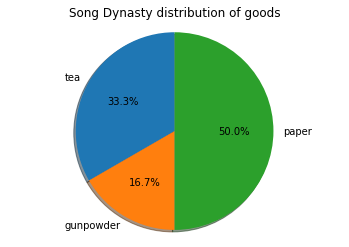

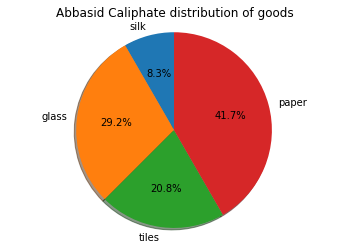

In [3]:
# Loop through each empire and see their distribution of goods before trade
for empire in empires:
    empire.show_distribution_of_goods()

So now we have an idea of what each empire is starting out with. Now let's see how the trading simulation will work

### Trading

For every timestep (year), each empire will have the opportunity to trade with each other empire. The probability that the empire will trade is controlled by a number called its innovation index, which is a number between 0 and 1. If the innovation index is 0.35, then there is a 35% chance that the empire will successfully trade with the other empire. Every five years, the empires will "innovate", meaning their innovation index will increase and therefore their probability of trade will increase. They will also "produce goods" which means they will produce a fraction of the goods they started out with, determined again by the innovation index.

In [5]:
for empire in empires:
    empire.reset()

# Set up the starting year and ending year
current_year = 1200
end_year = 1400
logger = Logger(empires, start_year=current_year)

# TODO: Mess with the starting innovation index to experiment
# If innovation_idx is left as None, it will just use the default
# innovation index defined in the Empire class
# ---- Your code below ---- #
innovation_idx = None
# ---- ---- #

# Loop through the years, and each year have each empire trade with one another
while current_year < end_year:
    for i, empire1 in enumerate(empires):
        for j, empire2 in enumerate(empires):
            # Don't let an empire trade with itself!
            if i != j:
                empire1.trade(empire2, innovation_idx=innovation_idx)
            
    # TODO: modify the innovation index every N number of timesteps in some way
    # ---- Your code below ---- #
    
    # ---- ---- #
    
    # Every 5 years, the empires will innovate and produce more goods
    if current_year % 5 == 0:
        for empire in empires:
            empire.innovate()
            empire.produce_goods()
            
    logger.update()
    current_year += 1

Don't be afriad to try out different stategies for modifying the innovation the index and see how it affects trading! 

### Results

Now that we've run the trading simulation, we can see the distribution of goods again.

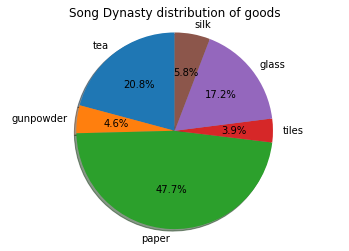

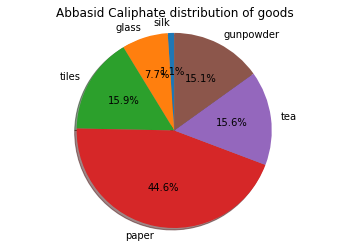

In [6]:
for empire in empires:
    empire.show_distribution_of_goods()

We can also use the logger to plot the quantity of each good over time. Just modify the list of items called "goods_to_show" to see different item quantities over time, or you can get rid of that function input entirely to see all the items traded over time.

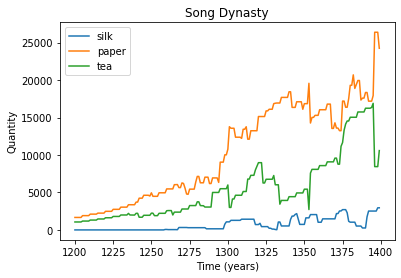

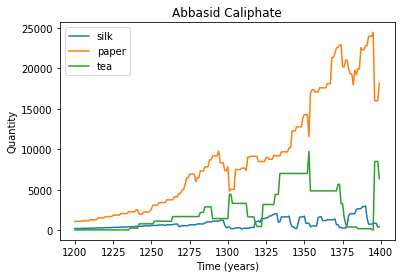

In [10]:
logger.plot_results(goods_to_show=['silk', 'paper', 'tea'])